In [3]:
import mne
import matplotlib.pyplot as plt

# Preparing raw data

In [2]:
# getting the raw data
raw_data = mne.io.read_raw_edf('./data/record.edf', preload=True)

Extracting EDF parameters from /home/delta/Projects/BioSignalProcessing/data/record.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 110999  =      0.000 ...   221.998 secs...


/tmp/ipykernel_3483/1700237610.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'SAO2'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf('./data/record.edf', preload=True)


In [5]:
raw_data.ch_names

['EEG FP1-A2_FP1-A',
 'EEG FP2-A1_FP2-A',
 'EEG F3-A2_F3-A2',
 'EEG F4-A1_F4-A1',
 'EEG C3-A2_C3-A2',
 'EEG C4-A1_C4-A1',
 'EEG P3-A2_P3-A2',
 'EEG P4-A1_P4-A1',
 'EEG O1-A2_O1-A2',
 'EEG O2-A1_O2-A1',
 'EEG F7-A2_F7-A2',
 'EEG F8-A1_F8-A1',
 'EEG T3-A2_T3-A2',
 'EEG T4-A1_T4-A1',
 'EEG T5-A2_T5-A2',
 'EEG T6-A1_T6-A1',
 'EEG FZ-A1_FZ-A1',
 'EEG CZ-A2_CZ-A2',
 'EEG PZ-A1_PZ-A1',
 'ECG  ECG',
 'SAO2-0',
 'PPG',
 'IP',
 'SAO2-1']

In [8]:
raw_data.drop_channels(['ECG  ECG', 'SAO2-0', 'PPG', 'IP', 'SAO2-1'])

Measurement date,"April 20, 2024 12:01:08 GMT"
Experimenter,Unknown
Participant,5d106bf1-e0b7-4ff8-a364-276fbd64079f
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [9]:
new_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
raw_data.rename_channels(dict(zip(raw_data.ch_names, new_names)))

Measurement date,"April 20, 2024 12:01:08 GMT"
Experimenter,Unknown
Participant,5d106bf1-e0b7-4ff8-a364-276fbd64079f
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [13]:
raw_data.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

**Making standard montage**

In [14]:
std_montage = mne.channels.make_standard_montage('standard_1020')

In [15]:
raw_data.set_montage(std_montage)

Measurement date,"April 20, 2024 12:01:08 GMT"
Experimenter,Unknown
Participant,5d106bf1-e0b7-4ff8-a364-276fbd64079f
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


Effective window size : 4.096 (s)


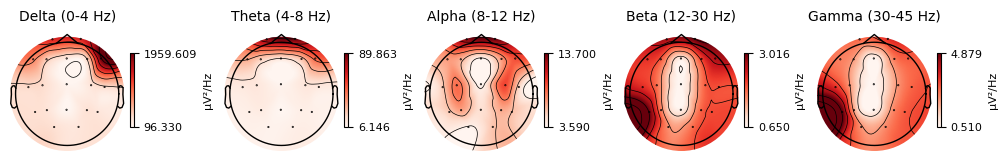

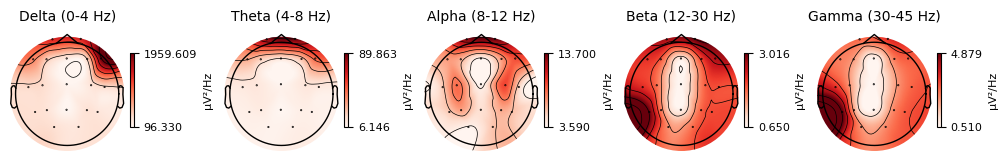

In [20]:
raw_data.compute_psd().plot_topomap()